<h1>
    1. Description of HAE
</h1>

<!DOCTYPE html>
<html>

<head>
  <style>
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      margin: 20px;
    }

    h2 {
      color: #333;
    }

    p {
      margin-bottom: 15px;
    }

    code {
      background-color: #f4f4f4;
      padding: 2px 6px;
      border-radius: 4px;
    }
  </style>
</head>

<body>

  <h2>Key Components:</h2>
  <p>
    <strong>Encoder:</strong> Each layer in the HAE has an encoder responsible for transforming the input data into a
    lower-dimensional representation. The encoder downsamples the input, capt
  uring essential features.
  </p>
  <p>
    <strong>Decoder:</strong> The decoder is the counterpart to the encoder. It reconstructs the input from the
    lower-dimensional representation. Each layer's decoder performs upsampling, reconstructing increasingly detailed
    information.
  </p>
  <p>
    <strong>GlobalNormalization:</strong> This module normalizes input variables during training, calculating running
    estimates of data statistics. It can optionally scale the standard deviation of inputs to 1.
  </p>

  <h2>Training Procedure:</h2>
  <ol>
    <li><strong>Initialization:</strong> The HAE can be initialized at different levels. The init_bottom method initializes
      the bottom layer, and th
    e init_higher method initializes higher layers.</li>
    <li><strong>Forward Pass:</strong> During a forward pass, the model encodes the input data using the encoder and then
      decodes it using the decoder. The global normalization module is applied during training to normalize inputs.</li>
    <li><strong>Loss Computation:</strong> The model computes the reconstruction loss, measuring the difference between the
      input and the reconstructed output. The loss is typically mean squared error (MSE) normalized by the number of
      elements in the output.</li>
    <li><strong>Training Step:</strong> In the training step, the model optimizes its parameters to minimize the
      reconstruction loss. This involves backpropagation and parameter updates using the chosen optimizer (RAdam) and
      scheduler (FlatCA).</li>
    <li><strong>Validation Step:</strong> Similar to the training step, the validation step computes the reconstruction
      loss on a validation dataset. The validation loss is logged for monitoring model performance.</li>
    <li><strong>Hierarchical Training:</strong> For higher layers, the model leverages the knowledge from the lower
      layers. When initializing a higher layer, the init_higher method is used, and the previous layer is frozen during
      training.</li>
    <li><strong>Hierarchical Reconstruction:</strong> During reconstruction, the model can use information from both the
      current layer and the lower layers. The encode_lower and decode_lower methods facilitate information flow between
      layers.</li>
  </ol>

  <h2>Inference Procedure:</h2>
  <ul>
    <li><strong>Reconstruction:</strong> To generate reconstructions or encode new data, the reconstruct method can be
      used. It encodes the input, decodes it, and returns the reconstructed output.</li>
    <li><strong>Reconstruct Average:</strong> The reconstruct_average method averages over multiple stochastic decodes,
      providing a more robust reconstruction.</li>
    <li><strong>Other Inference Methods:</strong> The model provides various methods for encoding, decoding, and
      reconstructing images, allowing flexibility for different use cases.</li>
  </ul>

  <h2>Summary:</h2>
  <p>
    The HAE operates as a hierarchical stack of autoencoders, each layer capturing a different level of abstraction.
    During training, the model learns to encode and decode data while leveraging information from lower layers. The
    hierarchical structure enables the model to learn complex representations in a modular and efficient manner. In
    inference, the trained model can be used to reconstruct images, encode new data.
  </p>

</body>

</html>


<!DOCTYPE html>
<html>

<head>
  <style>
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      margin: 20px;
    }

    h2 {
      color: #333;
    }

    p {
      margin-bottom: 15px;
    }

    code {
      background-color: #f4f4f4;
      padding: 2px 6px;
      border-radius: 4px;
    }
  </style>
</head>

<body>

  <h2>load_hae_from_checkpoints Function:</h2>
  <p>
    The <code>load_hae_from_checkpoints</code> function is designed to load a Hierarchical Autoencoder (HAE) model from a
    directory containing checkpoints for each layer. This function enables the seamless loading of pre-trained models for
    further use or evaluation.
  </p>

  <h2>Parameters:</h2>
  <ul>
    <li><code>n_layers:</code> The number of layers in the HAE model.</li>
    <li><code>checkpoints_dir:</code> The directory containing checkpoints for each layer.</li>
  </ul>

  <h2>Functionality:</h2>
  <p>
    The function iterates through each layer of the HAE, starting from layer 0, and loads the corresponding checkpoint
    using the Lightning module's <code>HAE.load_from_checkpoint</code> method. It initializes the HAE model, connecting
    each layer with the previous one.
  </p>
  <p>
    If the layer is the bottom layer (layer 0), it is initialized directly. For higher layers, the function loads the
    checkpoint and initializes the HAE using the <code>prev_model</code> parameter, which refers to the HAE model from
    the previous layer.
  </p>

  <h2>Return Value:</h2>
  <p>
    The function returns the fully loaded HAE model, which can be used for further analysis, evaluation, or additional
    training.
  </p>

  <h2>Example Usage:</h2>
  <p>
    <code>
      hae_model = load_hae_from_checkpoints(n_layers=5, checkpoints_dir='hae_checkpoints')
    </code>
  </p>
  <p>
    This example loads a 5-layer HAE model from the specified directory containing checkpoints for each layer.
  </p>

</body>

</html>


<!DOCTYPE html>
<html>

<head>
  <style>
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      margin: 20px;
    }

    h2 {
      color: #333;
    }

    p {
      margin-bottom: 15px;
    }

    code {
      background-color: #f4f4f4;
      padding: 2px 6px;
      border-radius: 4px;
    }
  </style>
</head>

<body>

  <h2>Training at Level 2 in the HAE:</h2>
  <p>
    When training at Level 2 in the Hierarchical Autoencoder (HAE), the model leverages the knowledge gained from the
    lower layers to enhance the learning process. The training procedure involves several key steps:
  </p>

  <h2>Initialization:</h2>
  <p>
    At Level 2, the model is initialized using the <code>init_higher</code> method, which takes the previously trained
    HAE model from Level 1 as the <code>prev_model</code> parameter. This initialization establishes a hierarchical
    connection, allowing the Level 2 model to build on the features learned by the Level 1 model.
  </p>

  <h2>Forward Pass:</h2>
  <p>
    During a forward pass, the input data is encoded using the encoder, capturing relevant features. The encoded data is
    then passed through the decoder to reconstruct the input. The global normalization module is applied during training
    to normalize inputs.
  </p>

  <h2>Loss Computation:</h2>
  <p>
    The model computes the reconstruction loss, which measures the difference between the input and the reconstructed
    output. This loss is typically mean squared error (MSE) normalized by the number of elements in the output.
  </p>

  <h2>Training Step:</h2>
  <p>
    In the training step, the model optimizes its parameters to minimize the reconstruction loss. This involves
    backpropagation and parameter updates using the chosen optimizer (RAdam) and scheduler (FlatCA).
  </p>

  <h2>Validation Step:</h2>
  <p>
    Similar to the training step, the validation step computes the reconstruction loss on a validation dataset. The
    validation loss is logged for monitoring the model's performance.
  </p>

  <h2>Hierarchical Training:</h2>
  <p>
    The hierarchical training process involves freezing the parameters of the lower layer (Level 1) during the training
    of the current layer (Level 2). This strategy ensures that the Level 2 model builds upon the knowledge captured by
    the Level 1 model without modifying its learned features.
  </p>

  <p>
    Overall, training at Level 2 in the HAE involves initializing the model, performing forward and backward passes to
    optimize parameters, and leveraging hierarchical information from lower layers to enhance the learning process.
  </p>

</body>

</html>


<h1>3. Creating the new classifier.</h1>

The new model is implemented in pytroch lightning refhae_I_100.py which is trained by the commad % python train_resnet.py --model_type refhae

<h1>
    2. Plotting accuracies a new reference model named refhae_I_100.py along with resnet18 and resnet50
</h1>

The following is the trained new reference classifier along with resnet18 and resnet50 plotting the accuracies on each level for Imagenet100 data.

In [9]:
from Datasets.ImageNetDataset import ImageNet100
from train_hae import load_hae_from_checkpoints
from train_resnet import test_recon_model
from torchvision import transforms
from tqdm import tqdm
from resnet_I_18 import resnetI18
from resnet_I_50 import resnetI50
from refhae_I_100 import hae_reference_classifier
from utils import *
from torch.utils.data import random_split
from torchattacks import FGSM

import torch
torch.cuda.empty_cache()

ROOT_FOLDER = '/home/dl_class/data/ILSVRC/Data/CLS-LOC/'

hae_model = load_hae_from_checkpoints()
ds_test = ImageNet100(ROOT_FOLDER, split='val', transform=transforms.Compose([
                                                            transforms.CenterCrop(224),
                                                            transforms.ToTensor() ]))

ds_test, _ = random_split(ds_test, [len(ds_test) - int((3/4)*len(ds_test)),int((3/4)*len(ds_test))])

print(f'Loaded {len(hae_model)} layer model')


hae_model.eval()

layer_descriptions = [
    "downsample 2 in each dimension, latent space size of 16x16",
    "downsample 4 in each dimension, latent space size of 8x8",
    "downsample 8 in each dimension, latent space size of 4x4",
    "downsample 16 in each dimension, latent space size of 2x2",
    "downsample 32 in each dimension, latent space size of 1x1",
]

# Show reconstruction comparison over each layer in HQA
my_dataset_orig, my_dataset_recon = recon_comparison(hae_model, ds_test, LAYER_NAMES, layer_descriptions)
resnet50 = resnetI50(None, None, 100, RESNET50_I100_PATH)
resnet50.load_state_dict(torch.load(RESNET50_I100_PATH))
hae_ref = hae_reference_classifier(None, None, 100, REFHAE_I100_PATH)
hae_ref.load_state_dict(torch.load(REFHAE_I100_PATH))
resnet18 = resnetI18(None, None, 100, RESNET18_I100_PATH)
resnet18.load_state_dict(torch.load(RESNET18_I100_PATH))

resnet18 = resnet18.to(device)
resnet50 = resnet50.to(device)
hae_ref = hae_ref.to(device)


i =0
hae_ref_classifier_Accuracies = []
resnet50_classifier_Accuracies = []
resnet18_classifier_Accuracies = []
print('\nAccuracies for HAE reference classifier')
for my_recon in my_dataset_recon:
    correct_idxs, incorrect_idxs, correct_rec_idxs, incorrect_rec_idxs, _, _ =test_recon_model(hae_ref, my_dataset_orig, my_recon, f"Layer{i}", attack = None)
    print(f"Accuracy: {len(correct_idxs)/(len(incorrect_idxs)+len(correct_idxs))}")
    print(f"Accuracy reconstruction of layer {i}: {len(correct_rec_idxs)/(len(incorrect_rec_idxs)+len(correct_rec_idxs))}")
    hae_ref_classifier_Accuracies.append([len(correct_idxs)/(len(incorrect_idxs)+len(correct_idxs)),len(correct_rec_idxs)/(len(incorrect_rec_idxs)+len(correct_rec_idxs))])
    i=i+1
print('\nAccuracies for ResNET50')
i = 0
for my_recon in my_dataset_recon:
    correct_idxs, incorrect_idxs, correct_rec_idxs, incorrect_rec_idxs, _, _ =test_recon_model(resnet50, my_dataset_orig, my_recon, f"Layer{i}", attack = None)
    print(f"Accuracy: {len(correct_idxs)/(len(incorrect_idxs)+len(correct_idxs))}")
    print(f"Accuracy reconstruction of layer {i}: {len(correct_rec_idxs)/(len(incorrect_rec_idxs)+len(correct_rec_idxs))}")
    resnet50_classifier_Accuracies.append([len(correct_idxs)/(len(incorrect_idxs)+len(correct_idxs)),len(correct_rec_idxs)/(len(incorrect_rec_idxs)+len(correct_rec_idxs))])
    i=i+1
print('\nAccuracies for ResNET18')
i = 0
for my_recon in my_dataset_recon:
    correct_idxs, incorrect_idxs, correct_rec_idxs, incorrect_rec_idxs, _, _ =test_recon_model(resnet18, my_dataset_orig, my_recon, f"Layer{i}", attack = None)
    print(f"Accuracy: {len(correct_idxs)/(len(incorrect_idxs)+len(correct_idxs))}")
    print(f"Accuracy reconstruction of layer {i}: {len(correct_rec_idxs)/(len(incorrect_rec_idxs)+len(correct_rec_idxs))}")
    resnet18_classifier_Accuracies.append([len(correct_idxs)/(len(incorrect_idxs)+len(correct_idxs)),len(correct_rec_idxs)/(len(incorrect_rec_idxs)+len(correct_rec_idxs))])
    i=i+1


Loaded 5 layer model

Accuracies for HAE reference classifier
Accuracy: 0.0128
Accuracy reconstruction of layer 0: 0.0128
Accuracy: 0.0128
Accuracy reconstruction of layer 1: 0.0128
Accuracy: 0.0128
Accuracy reconstruction of layer 2: 0.0128
Accuracy: 0.0128
Accuracy reconstruction of layer 3: 0.0128
Accuracy: 0.0128
Accuracy reconstruction of layer 4: 0.0128

Accuracies for ResNET50
Accuracy: 0.7816
Accuracy reconstruction of layer 0: 0.7816
Accuracy: 0.7816
Accuracy reconstruction of layer 1: 0.7816
Accuracy: 0.7816
Accuracy reconstruction of layer 2: 0.7816
Accuracy: 0.7816
Accuracy reconstruction of layer 3: 0.7816
Accuracy: 0.7816
Accuracy reconstruction of layer 4: 0.7816

Accuracies for ResNET18
Accuracy: 0.7704
Accuracy reconstruction of layer 0: 0.7704
Accuracy: 0.7704
Accuracy reconstruction of layer 1: 0.7704
Accuracy: 0.7704
Accuracy reconstruction of layer 2: 0.7704
Accuracy: 0.7704
Accuracy reconstruction of layer 3: 0.7704
Accuracy: 0.7704
Accuracy reconstruction of laye

In [10]:
print(hae_ref_classifier_Accuracies)
print(resnet50_classifier_Accuracies)
print(resnet18_classifier_Accuracies)

[[0.0128, 0.0128], [0.0128, 0.0128], [0.0128, 0.0128], [0.0128, 0.0128], [0.0128, 0.0128]]
[[0.7816, 0.7816], [0.7816, 0.7816], [0.7816, 0.7816], [0.7816, 0.7816], [0.7816, 0.7816]]
[[0.7704, 0.7704], [0.7704, 0.7704], [0.7704, 0.7704], [0.7704, 0.7704], [0.7704, 0.7704]]


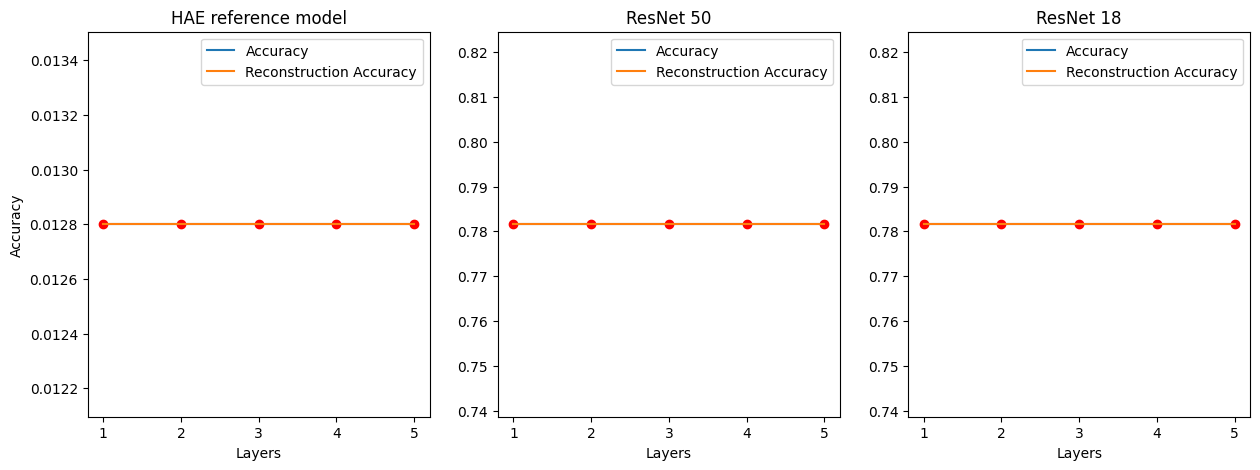

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


fig, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 1]})

highlighted_layers = [1, 2, 3, 4, 5]

# Plot curves for Model 1
model1_accuracy, model1_reconstruction_accuracy = zip(*hae_ref_classifier_Accuracies)
axs[0].plot(range(1, 6), model1_accuracy, label='Accuracy')
axs[0].plot(range(1, 6), model1_reconstruction_accuracy, label='Reconstruction Accuracy')
axs[0].scatter(highlighted_layers, [model1_accuracy[i-1] for i in highlighted_layers], color='red')  # Highlight points
axs[0].set_title('HAE reference model')
axs[0].set_xlabel('Layers')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot curves for Model 2
model2_accuracy, model2_reconstruction_accuracy = zip(*resnet50_classifier_Accuracies)
axs[1].plot(range(1, 6), model2_accuracy, label='Accuracy')
axs[1].plot(range(1, 6), model2_reconstruction_accuracy, label='Reconstruction Accuracy')
axs[1].scatter(highlighted_layers, [model2_accuracy[i-1] for i in highlighted_layers], color='red')  # Highlight points
axs[1].set_title('ResNet 50')
axs[1].set_xlabel('Layers')
axs[1].legend()

# Plot curves for Model 3
model3_accuracy, model3_reconstruction_accuracy = zip(*resnet50_classifier_Accuracies)
axs[2].plot(range(1, 6), model3_accuracy, label='Accuracy')
axs[2].plot(range(1, 6), model3_reconstruction_accuracy, label='Reconstruction Accuracy')
axs[2].scatter(highlighted_layers, [model3_accuracy[i-1] for i in highlighted_layers], color='red')  # Highlight points
axs[2].set_title('ResNet 18')
axs[2].set_xlabel('Layers')
axs[2].legend()

# Set x-axis ticks to integers
for ax in axs:
    ax.set_xticks(range(1, 6))


plt.show()


<h1>Confusion matrices</h1>

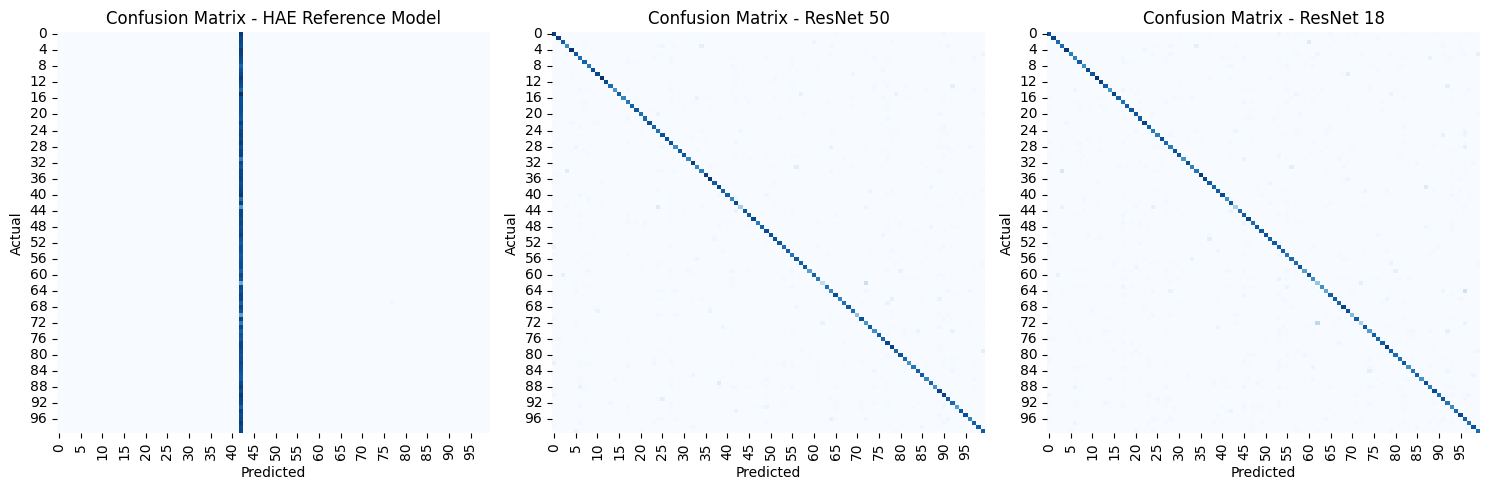

In [4]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from load_datasets import load_ImageNet100


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
dl_train, dl_valid, _ = load_ImageNet100(validate=True)
# Model 1 - HAE Reference Model
y_true_model1, y_pred_model1 = [], []
with torch.no_grad():
    for inputs, labels in dl_valid:  
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = hae_ref(inputs)  
        _, predicted = torch.max(outputs, 1)
        y_true_model1.extend(labels.cpu().numpy())
        y_pred_model1.extend(predicted.cpu().numpy())

# Plot confusion matrix for Model 1
conf_matrix_model1 = confusion_matrix(y_true_model1, y_pred_model1)
sns.heatmap(conf_matrix_model1, annot=False, fmt='d', cmap='Blues', cbar=False, ax=axs[0])
axs[0].set_title('Confusion Matrix - HAE Reference Model')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

# Model 2 - ResNet 50
y_true_model2, y_pred_model2 = [], []
with torch.no_grad():
    for inputs, labels in dl_valid:  
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet50(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true_model2.extend(labels.cpu().numpy())
        y_pred_model2.extend(predicted.cpu().numpy())

# Plot confusion matrix for Model 2
conf_matrix_model2 = confusion_matrix(y_true_model2, y_pred_model2)
sns.heatmap(conf_matrix_model2, annot=False, fmt='d', cmap='Blues', cbar=False, ax=axs[1])
axs[1].set_title('Confusion Matrix - ResNet 50')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

# Model 3 - ResNet 18
y_true_model3, y_pred_model3 = [], []
with torch.no_grad():
    for inputs, labels in dl_valid:  
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet18(inputs)  
        _, predicted = torch.max(outputs, 1)
        y_true_model3.extend(labels.cpu().numpy())
        y_pred_model3.extend(predicted.cpu().numpy())

# Plot confusion matrix for Model 3
conf_matrix_model3 = confusion_matrix(y_true_model3, y_pred_model3)
sns.heatmap(conf_matrix_model3, annot=False, fmt='d', cmap='Blues', cbar=False, ax=axs[2])
axs[2].set_title('Confusion Matrix - ResNet 18')
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('Actual')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Display the plots
plt.show()


<h2>
    4. Frechet Inception Distance
</h2>

In [5]:
my_dataset_orig, my_dataset_recon = recon_comparison(hae_model, ds_test, LAYER_NAMES, layer_descriptions)
print(type(my_dataset_orig))
print(type(my_dataset_recon))
print(type(my_dataset_recon[0]))

<class 'torch.utils.data.dataset.TensorDataset'>
<class 'list'>
<class 'torch.utils.data.dataset.TensorDataset'>


In [7]:
import torch
from torchmetrics.image.fid import FrechetInceptionDistance


# Extract image tensors from my_dataset_recon
recon_images = torch.stack([item[0][0] for item in my_dataset_recon])

# Assuming my_dataset_orig is also a tuple dataset with the image tensor as the first element
orig_images = torch.stack([item[0] for item in my_dataset_orig])


# Convert images to torch.uint8
orig_images = orig_images.to(torch.uint8)
recon_images = recon_images.to(torch.uint8)


# Initialize the FID metric
fid_metric = FrechetInceptionDistance(feature=64)

# Update the metric with real and generated images
fid_metric.update(orig_images, real=True)
fid_metric.update(recon_images, real=False)

# Compute the FID score
fid_score = fid_metric.compute()

# Reset the metric for future evaluations
fid_metric.reset()

# Print or use the FID score as needed
print("Frechet Inception Distance:", fid_score)


Frechet Inception Distance: tensor(0.0008)


<h1>
    5,8
</h1>
 <p1>   
    Added Tensor board logging for the training of the reference classifier (refhae_I_100.py) and also changed train_resnet.py and created a new class pytorch_resnet_lightning.py (created a new file so that we dont have both lightning and pytorch classes in the same file) to use pytorch lightning and log the losses while training and validation.
</p1>

<h2>
    To train any reference classifier either resnet18 or resnet50 or refhae_I_100.py we just need to run any of the following commands
</h2>

%python train_resnet.py --model_type resnet50
</br>
%python train_resnet.py --model_type resnet18
</br>
%python train_resnet.py --model_type refhae

These commands select the appropriate base classifier and tests trains the model on the Imagenet100 and saves the training and validation accuracies in /final/Visuals/Miscellaneous/

<h1>
    9. Different levels of lossy reconstructions
</h1>

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Pros and Cons of Approaches</title>
  <style>
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
    }
    h2 {
      color: #333;
    }
    .pros-cons {
      display: flex;
      justify-content: space-between;
    }
    .pros {
      flex: 1;
      color: #006400;
    }
    .cons {
      flex: 1;
      color: #8B0000;
    }
  </style>
</head>
<body>

  <h1>Approach A: Create Reconstructions and Save as New Files</h1>
  <div class="pros-cons">
    <div class="pros">
      <h2>Pros:</h2>
      <ul>
        <li>Efficiency: Once created, can be reused for multiple evaluations.</li>
        <li>Time Saving: Avoids redundant computations during evaluation.</li>
      </ul>
    </div>
    <div class="cons">
      <h2>Cons:</h2>
      <ul>
        <li>Storage Overhead: May consume additional storage space.</li>
        <li>Staleness: Saved files may become outdated if the model is updated.</li>
      </ul>
    </div>
  </div>

  <h1>Approach B: Run HAE Model Within the Evaluation Script Every Time</h1>
  <div class="pros-cons">
    <div class="pros">
      <h2>Pros:</h2>
      <ul>
        <li>Real-time Adaptability: Uses the latest version of the model.</li>
        <li>Storage Efficiency: Does not require saving additional files.</li>
      </ul>
    </div>
    <div class="cons">
      <h2>Cons:</h2>
      <ul>
        <li>Computational Overhead: May be computationally expensive.</li>
        <li>Time-Consuming: May result in longer evaluation times.</li>
      </ul>
    </div>
  </div>

</body>
</html>
